# INFO371 Homework: Decision Trees 

Your task for this assignment is to explore a dataset using decision trees in order to give you some experience with trees and hyperparameter tuning. This lab asks you to play with classification trees and find the best combination of hyperparameters. Your goal is to try to get as good accuracy as possible! Keep in mind some of these experiemnts will take a while to run -- make sure you start early and give yourself enough time to finish the assignment. 

## Data
In this assignment, you will work with a dataset to try to predicit whether someone is at high or low risk of having a heart attack given some general health information about each person. The dataset has the following features: 

* Age : Age of the patient
* Sex : Sex of the patient (0 = Male, 1 = Female)
* exang: exercise induced angina (1 = yes; 0 = no)
* caa: number of major vessels (0-3)
* cp : Chest Pain type
     * Value 0: typical angina
     * Value 1: atypical angina
     * Value 2: non-anginal pain
     * Value 3: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved
* old peak: ST depression induced by exercise relative to rest
* slp: the slope of the peak exercise ST segment
    * 0 = unsloping
    * 1 = flat
    * 2 = downsloping
* thall : thalassemia
    * 0 = null
    * 1 = fixed defect
    * 2 = normal
    * 3 = reversable defect
* output : 0= less chance of heart attack 1= more chance of heart attack

Note that the column "output" is your label (i.e. the thing you are trying to predict). 

---
For some more information on some of the health definitions: 
* [Angina](https://www.nhs.uk/conditions/angina/#:~:text=Angina%20is%20chest%20pain%20caused,of%20these%20more%20serious%20problems): chest pain due to reduced blood flow to the heart muscles. There're 3 types of angina: stable angina, unstable angina, and variant angina.

* ECG: short for electrocardiogram, it's a routine test usually done to check the heart's electrical activity.

* [ST depression](https://litfl.com/st-segment-ecg-library/): a type of ST-segment abnormality. the ST segment is the flat, isoelectric part of the ECG and it represents the interval between ventricular depolarization and repolarization.

* Thalassemia: is a genetic blood disorder that is characterized by a lower rate of hemoglobin than normal.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn import tree

## Dataset Exploration

1. load the dataset and ensure it looks good 


2. Split your dataset into your feature set and label set. Then do a random test/train split of 80/20. 


In [73]:
# code goes here
#1
hrt = pd.read_csv("heart.csv.bz2")

print(hrt.shape)
print()
print(hrt.isna().sum())

(303, 14)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [74]:
#2
features = hrt.loc[:, ~hrt.columns.isin(['output'])].copy()
labels = hrt.loc[:, hrt.columns.isin(['output'])].copy()

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20)

## Baseline Model Comparison 

3. Get a baseline accuracy using the naive model (i.e. a model where you assign the same label to all your testing data and that label is the one that appeared the most in your training data). 


4. Train a decision tree classifier using the default parameters except you should use the information gain/entropy metric for splitting. Report the training and testing accuracy. 


5. Plot the resulting decision tree and examine its structure. You can use the [function provided by scikitlearn library](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) to do so.  Do these features in that order make sense? Does this tell you anything interesting about your features? Did any of these suprise you? 

In [75]:
#3
dummy_cls = DummyClassifier(strategy = "constant", constant = 1)
dummy_cls.fit(X_train, y_train)
dummy_cls.score(X_test, y_test) #baseline accuracy using the naive model (DummyClassifier)

0.5409836065573771

In [76]:
#4
d_tree = tree.DecisionTreeClassifier(criterion = "entropy")
d_tree.fit(X_train, y_train)

print(d_tree.score(X_train, y_train)) #training accuracy
print(d_tree.score(X_test, y_test)) #testing accuracy

1.0
0.7540983606557377


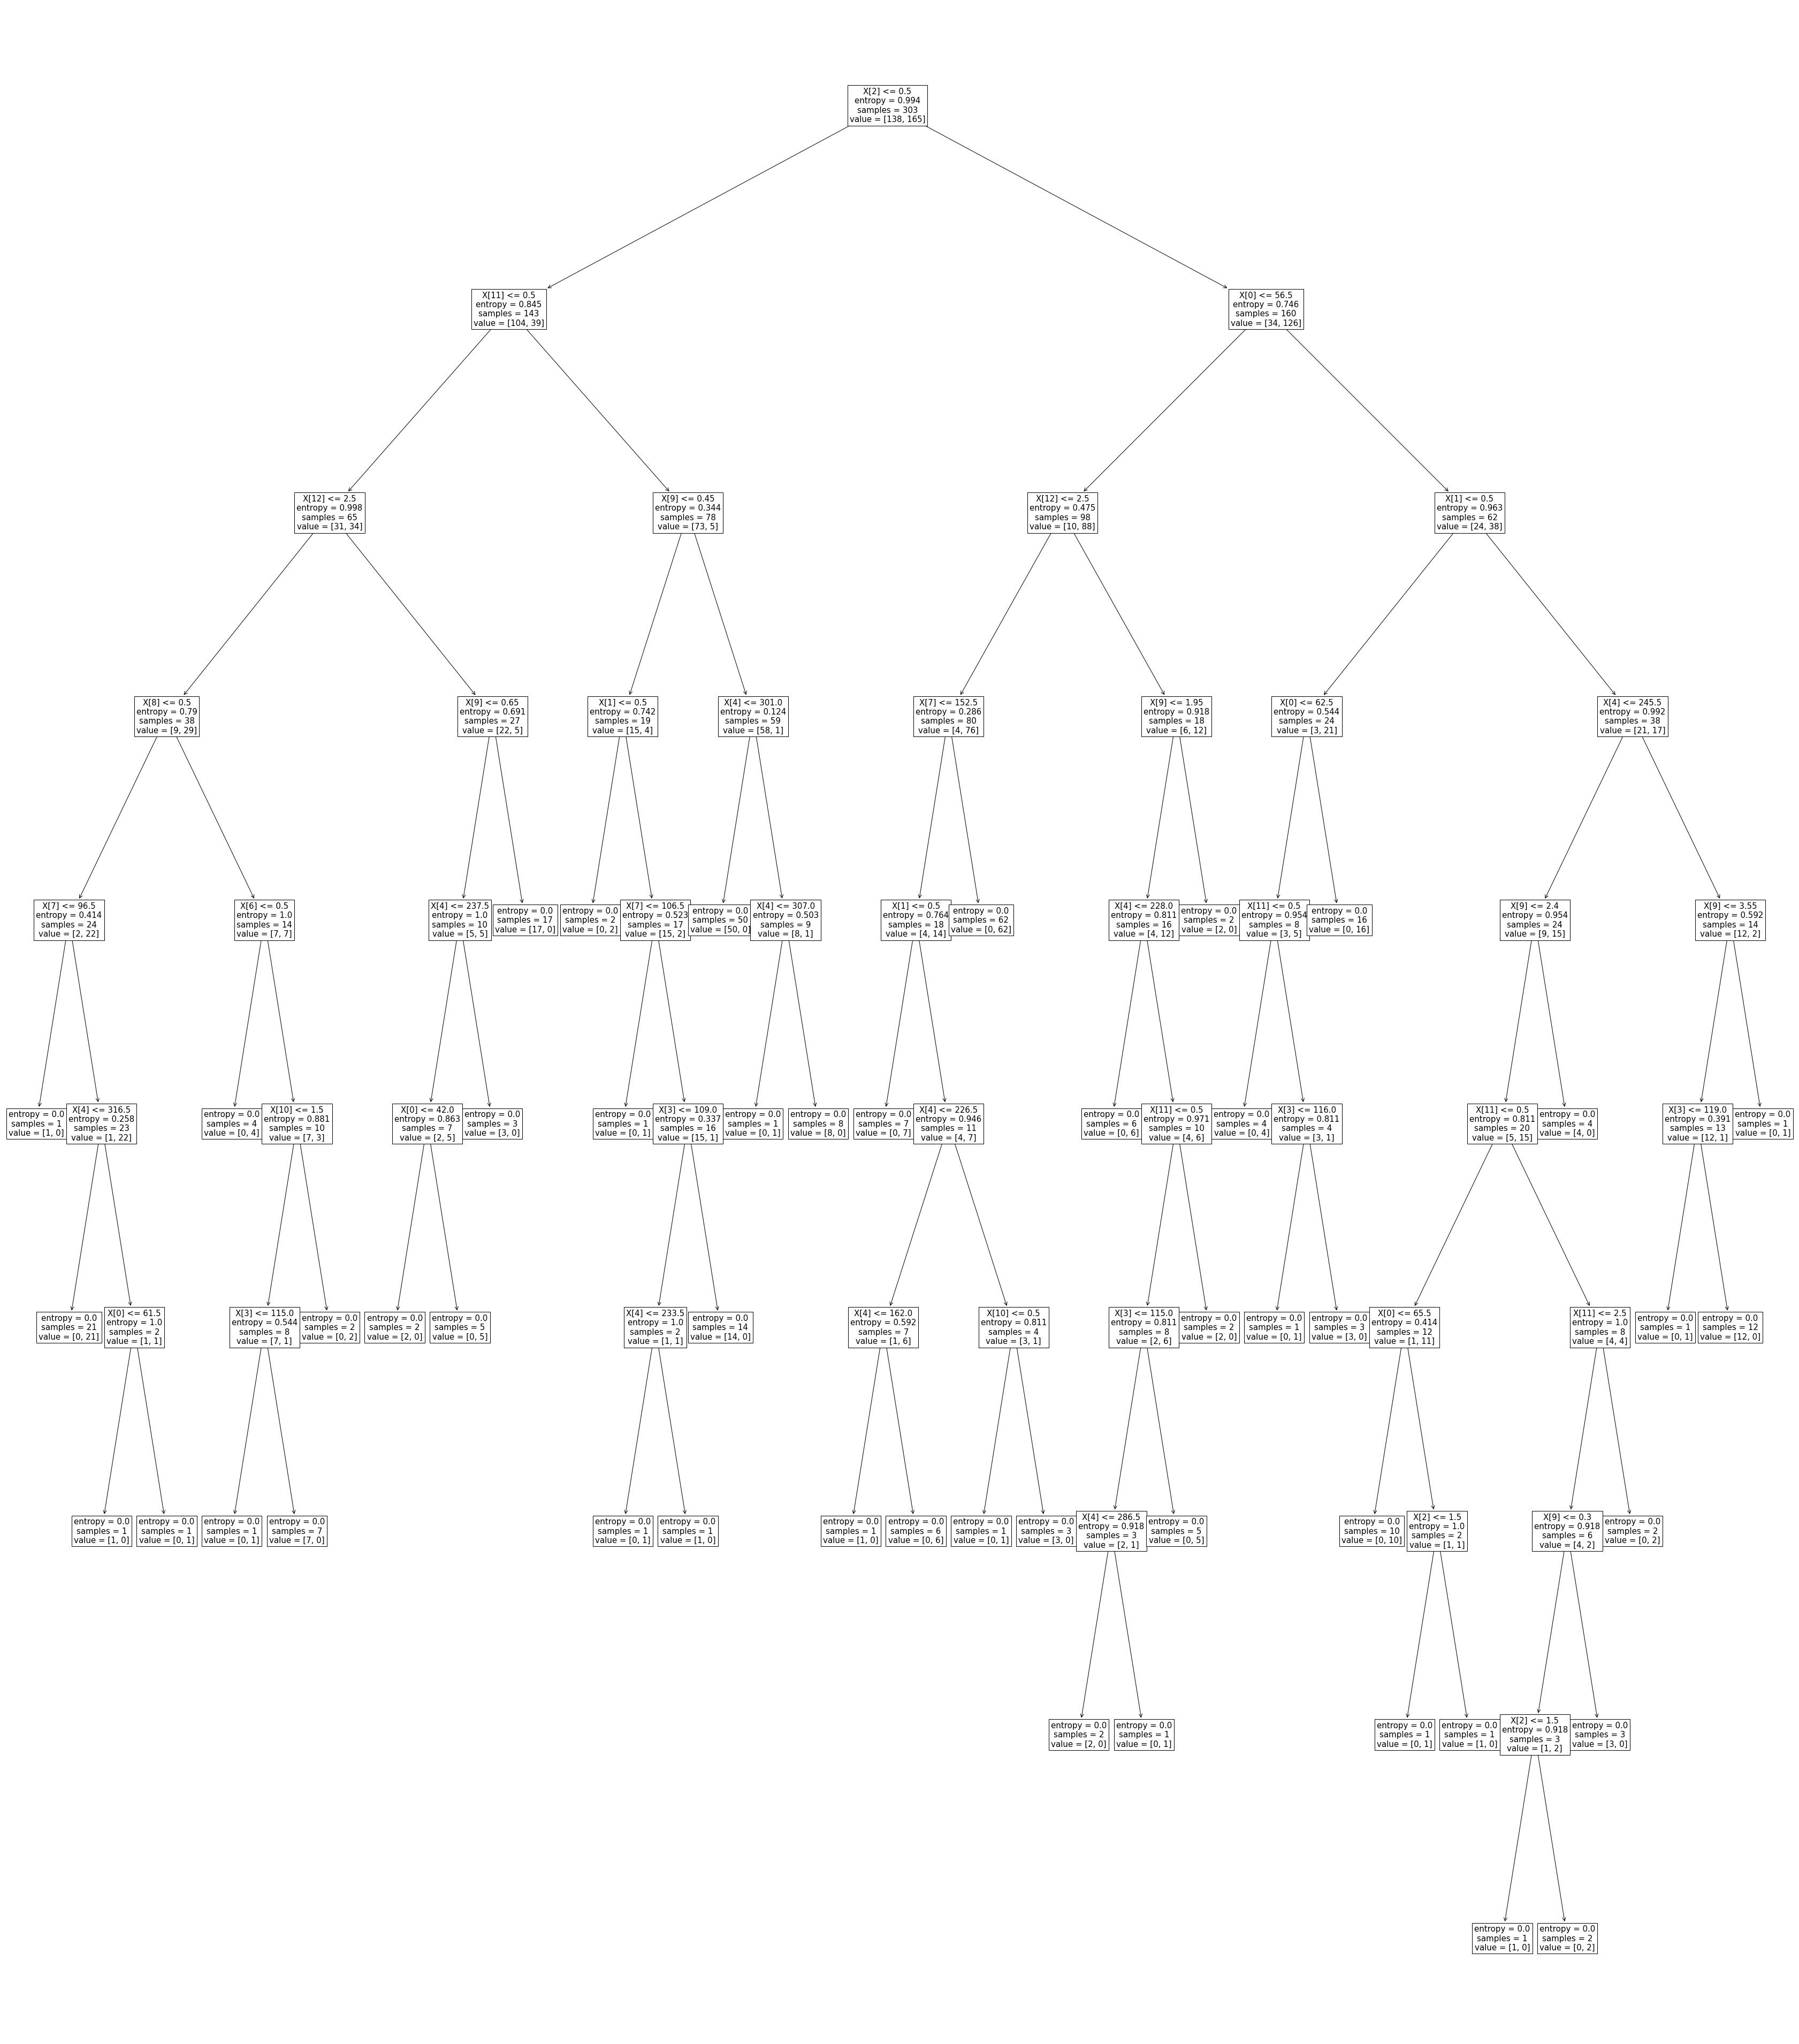

In [77]:
#5
d_tree = d_tree.fit(features, labels)

fig, axe = plt.subplots(figsize=(60,70))
tree.plot_tree(d_tree, ax = axe, fontsize=15)
plt.show()

Values and their entropy decrease as they move towards the bottom of the tree, indicating improvement in data purity.

## Tuning the Model

6. Now lets try to examine average performance across different random splits. Run the model at least 10 times on different random splits of your data and report the average testing and training accuracy as well as the standard deviation. For an idea on how to do this, take a look at some of the lecture code we’ve done in class. Please don't use the cross-validation function here -- we want you to write this part yourself. 

    Hint – its probably a good idea to write a function to do this since you will be using this code to tune the various parameters. 



7. Now lets examine what happens as you increase the complexity of the model. Tune the model by examining various max-tree-depth. Plot the __average__ training and testing accuracy for each value of tree depth (NOTE - this means you'll have to run your model multiple times to get average accuracy. Use your function from step 6 to get this score). Accuracy should be on the y-axis and tree-depth should be on the x-axis. 



8. Explain what overfitting and underfitting is. How do you know when you are overfitting? Using your plot from question 7, explain when you are underfitting and overfitting your decision tree model. NOTE -- if you do not see overfitting, you may need to keep increasing the max-tree-depth. 


9. Now lets examine what happens when you tune a different parameter. Tune the model now by examining min_samples_split. Plot the __average__ training and testing accuracy for each value of min_samples_split. Accuracy should be on the y-axis and min_samples_split should be on the x-axis. Then explain on this plot where overfitting is happening. 

    Note -- we are tuning this parameter in isolation so you should set the max tree depth to whatever the default was. Don't use what you got in step 7.


10. Now lets examine what happens when you tune a different parameter. Tune the model now by examining min_samples_leaf. Plot the __average__ training and testing accuracy for each value of min_samples_leaf. Accuracy should be on the y-axis and min_samples_split should be on the x-axis. Then explain on this plot where overfitting is happening. 

    Note -- we are tuning this parameter in isolation so you should set the max tree depth to whatever the default was. Don't use what you got in step 7 or step 9.


11. Now that we've examined the hyperparamters in isolation, lets now perform a 3-D grid search across all three hyperparameters (see your lab notes on how to do this!). Use __average__ testing accuracy to chose your best parameters. How does the avarage testing accuracy with the all three best paramters perform? How does it compare to your completely untuned model (i.e. the one with all default parameters)? 



In [78]:
#6
def avg_perf():
    train_score = []
    test_score = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20)
        d_tree = tree.DecisionTreeClassifier(criterion = "entropy")
        d_tree.fit(X_train, y_train)
        train_score.append(d_tree.score(X_train, y_train)) 
        test_score.append(d_tree.score(X_test, y_test))
    avg_train = np.sum(train_score) / len(train_score)
    train_std = np.std(train_score)
    avg_test = np.sum(test_score) / len(test_score)
    test_std = np.std(test_score)
    return avg_train, train_std, avg_test, test_std

avg_train, train_std, avg_test, test_std = avg_perf()

avg_train, train_std, avg_test, test_std

(1.0, 0.0, 0.7344262295081967, 0.039344262295081964)

In [79]:
#7
max_dep = list(range(1, 11))

def dep():    
    ave_train = []
    ave_test = []
    for i in max_dep:
        train_score = []
        test_score = []
        for j in range(10):
            X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20)
            d_tree = tree.DecisionTreeClassifier(max_depth = i, min_samples_split = 2, min_samples_leaf = 1, criterion = "entropy")
            d_tree.fit(X_train, y_train)
            train_score.append(d_tree.score(X_train, y_train)) 
            test_score.append(d_tree.score(X_test, y_test))
        ave_train = np.append(ave_train, (np.sum(train_score) / len(train_score)))
        ave_test = np.append(ave_test, (np.sum(test_score) / len(test_score)))
    return ave_train, ave_test 

ave_train, ave_test = dep()

ave_train, ave_test

(array([0.76033058, 0.77809917, 0.84008264, 0.87561983, 0.92561983,
        0.9607438 , 0.97892562, 0.99132231, 0.99545455, 0.99793388]),
 array([0.74262295, 0.72622951, 0.80327869, 0.73278689, 0.76885246,
        0.7557377 , 0.74098361, 0.7295082 , 0.74754098, 0.75737705]))

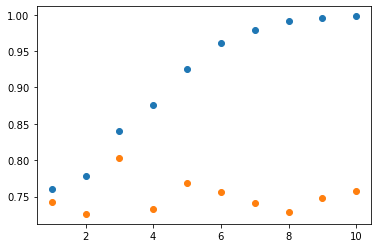

In [80]:
#7- blue: y-axis: training accuracy / yellow: y-axis: testing accuracy
plt.scatter(x = max_dep, y = ave_train)
plt.scatter(x = max_dep, y = ave_test)

In [81]:
#8

Overfitting is a modeling error when a set of data is overtrained, resulting in high performance on the training data while low performance on the testing data. Underfitting occurs when the model has not trained enough and is not able to determine a relationship between data. Overfitting can be recognized when the training accuracy starts significantly being higher than the testing accuracy. According to the plots above, the model starts overfitting when the training and testing accuracy begins being far away from each other.

In [82]:
#9
import random
min_split = sorted(random.sample(range(2, 101), 10))

def split():    
    ave_train = []
    ave_test = []
    for i in min_split:
        train_score = []
        test_score = []
        for j in range(10):
            X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20)
            d_tree = tree.DecisionTreeClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split = i, criterion = "entropy")
            d_tree.fit(X_train, y_train)
            train_score.append(d_tree.score(X_train, y_train)) 
            test_score.append(d_tree.score(X_test, y_test))
        ave_train = np.append(ave_train, (np.sum(train_score) / len(train_score)))
        ave_test = np.append(ave_test, (np.sum(test_score) / len(test_score)))
    return ave_train, ave_test 

ave_train, ave_test = split()

ave_train, ave_test

(array([0.9268595 , 0.83471074, 0.83553719, 0.78264463, 0.77272727,
        0.78595041, 0.78016529, 0.78347107, 0.77272727, 0.77190083]),
 array([0.76557377, 0.8       , 0.74754098, 0.70327869, 0.72131148,
        0.71311475, 0.73114754, 0.70491803, 0.75245902, 0.7442623 ]))

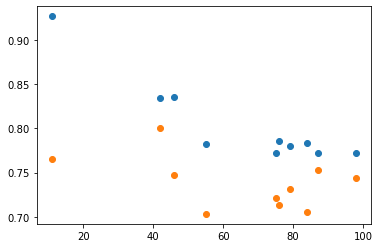

In [83]:
#9 - blue: y-axis: training accuracy / yellow: y-axis: testing accuracy
plt.scatter(x = min_split, y = ave_train)
plt.scatter(x = min_split, y = ave_test)

Underfitting occurs when all training and testing accuracy start decreasing together.

In [84]:
#10
min_leaf = sorted(random.sample(range(1, 101), 10))

def leaf():    
    ave_train = []
    ave_test = []
    for i in min_leaf:
        train_score = []
        test_score = []
        for j in range(10):
            X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20)
            d_tree = tree.DecisionTreeClassifier(max_depth = None, min_samples_split = 2, min_samples_leaf = i, criterion = "entropy")
            d_tree.fit(X_train, y_train)
            train_score.append(d_tree.score(X_train, y_train)) 
            test_score.append(d_tree.score(X_test, y_test))
        ave_train = np.append(ave_train, (np.sum(train_score) / len(train_score)))
        ave_test = np.append(ave_test, (np.sum(test_score) / len(test_score)))
    return ave_train, ave_test 

ave_train, avg_test = leaf()

ave_train, avg_test

(array([0.94380165, 0.83181818, 0.77644628, 0.75826446, 0.7607438 ,
        0.76446281, 0.76033058, 0.7607438 , 0.76198347, 0.76363636]),
 array([0.75737705, 0.80163934, 0.72131148, 0.75245902, 0.72131148,
        0.73114754, 0.73606557, 0.75245902, 0.71639344, 0.74098361]))

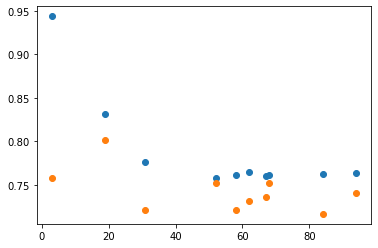

In [85]:
#10 - blue: y-axis: training accuracy / yellow: y-axis: testing accuracy
plt.scatter(x = min_leaf, y = ave_train)
plt.scatter(x = min_leaf, y = avg_test)

The model starts overfitting when the training and testing accuracy begins being far away from each other.

In [86]:
#11
new_accu = 0
curr_accu = 0

depth = 0
split = 0
leaf = 0

for i in max_dep:
    for j in min_split:
        for k in min_leaf:
            X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20)
            d = tree.DecisionTreeClassifier(max_depth = i, min_samples_split = j, min_samples_leaf = k, criterion = "entropy")
            d.fit(X_train, y_train)
            new_accu = d.score(X_test, y_test)
            if curr_accu < new_accu:
                curr_accu = new_accu
                depth = i
                split = j
                leaf = k
                
print(curr_accu) #best testing accuracy
print(depth, split, leaf) #corresponding hyperparameter combination - depth, split, leaf

0.9016393442622951
5 84 94


The testing accuracy with the best hyperparameters results in a significantly higher accuracy compared to the untuned model.

## Compare Performance with Random Forests 

Now lets compare our performance by using a random forest model. 

12. Using the same test/train split as you used in Question 4, train a RandomForestClassifier model using default parameters and the ''entropy'' criterion. Report the testing and trainign accuracy. How does this model's accuracy compare to what you found in Question 4? 


13. Now using this random forest model, examine the imporance of each of the features in the dataset. You don't have to write this yourself, see this [documentaion](https://scikit-learn.org/stable/modules/feature_selection.html#tree-based-feature-selection) and this [example](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py) for how to do this in Python. How do these features compare to what you found in Question 5? Are they the same? Do any of these results suprise you? 


14. Now lets try to examine average performance across different random splits. Run the model at least 10 times on different random splits of your data and report the average testing and training accuracy as well as the standard deviation. Again, please don't use the cross-validation function here -- we want you to write this part yourself. You may use the same function as you did in Question 6 if you would like. 


15. Now lets examine what happens as you increase the complexity of the model by increasing the number of trees to include in our forest. Tune the model by examining a range of n_estimators. Plot the __average__ training and testing accuracy for each value of n_estimators (NOTE - this means you'll have to run your model multiple times to get average accuracy. Use your function from step 14 to get this score). Accuracy should be on the y-axis and n_estimators should be on the x-axis.


16. Using this plot explain what happens as you increase the number of trees in your forest. Are there trade-offs you have to consider?


17. Compare your results with Random Forest to the results you got with just one decision tree and write up your obervations and analysis. Which model are you finding is typically more accurate? Which model tended to overfit more? Are there any considerations you need to think about when chosing between Forests versus single trees? 

In [87]:
#code goes here 
from sklearn.ensemble import RandomForestClassifier

In [88]:
#12
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20)

r_tree = RandomForestClassifier(criterion = "entropy")
r_tree.fit(X_train, y_train.values.ravel())

print(d_tree.score(X_train, y_train))
print(d_tree.score(X_test, y_test))

1.0
1.0


This model's accuracy is better that the accuracy computed in Question 4.

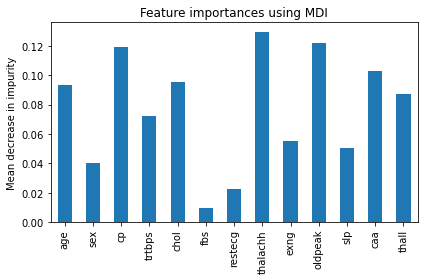

In [89]:
#13
forest_importances = pd.Series(r_tree.feature_importances_, index = features.columns)

fig, ax = plt.subplots()
std = np.std([r_tree.feature_importances_ for tree in r_tree.estimators_], axis=0)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

The greater decrease in impurity indicates higher feature importance in the model.

In [90]:
#14
def avg_perf():
    train_score = []
    test_score = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20)
        r_tree = RandomForestClassifier(criterion = "entropy")
        r_tree.fit(X_train, y_train.values.ravel())
        train_score.append(r_tree.score(X_train, y_train)) 
        test_score.append(r_tree.score(X_test, y_test))
    avg_train = np.sum(train_score) / len(train_score)
    train_std = np.std(train_score)
    avg_test = np.sum(test_score) / len(test_score)
    test_std = np.std(test_score)
    return avg_train, train_std, avg_test, test_std

avg_train, train_std, avg_test, test_std = avg_perf()

avg_train, train_std, avg_test, test_std

(1.0, 0.0, 0.8344262295081968, 0.03550230791427494)

In [91]:
#15
n_estimator = sorted(random.sample(range(10, 151), 20))

def n_est():    
    ave_train = []
    ave_test = []
    for i in n_estimator:
        train_score = []
        test_score = []
        for j in range(10):
            X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20)
            r_tree = RandomForestClassifier(n_estimators = i, criterion = "entropy")
            r_tree.fit(X_train, y_train.values.ravel())
            train_score.append(r_tree.score(X_train, y_train)) 
            test_score.append(r_tree.score(X_test, y_test))
        ave_train = np.append(ave_train, (np.sum(train_score) / len(train_score)))
        ave_test = np.append(ave_test, (np.sum(test_score) / len(test_score)))
    return ave_train, ave_test 

ave_train, ave_test = n_est()

ave_train, ave_test

(array([0.99504132, 0.99752066, 0.99917355, 0.99958678, 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.99958678, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]),
 array([0.79344262, 0.80163934, 0.82622951, 0.82622951, 0.84262295,
        0.81967213, 0.81639344, 0.81803279, 0.83114754, 0.82459016,
        0.82622951, 0.79508197, 0.80983607, 0.8147541 , 0.81639344,
        0.83770492, 0.82295082, 0.79016393, 0.82131148, 0.81311475]))

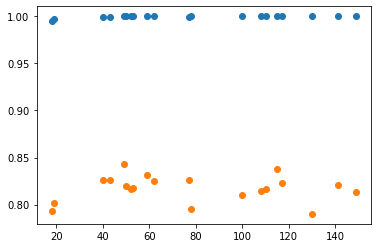

In [92]:
#15
plt.scatter(x = n_estimator, y = ave_train)
plt.scatter(x = n_estimator, y = ave_test)

In [93]:
#16

The model generates a consistent accuracy and it is slightly increasing as increasing the number of trees.

In [94]:
#17

The decision tree model outperforms the Random Forest model overall in terms of their accuracy. However, decision tree models have a higher risk of overfitting to training data compared to Random Forest models. For larger datasets, Random Forest is more appropriate as it is less likely to overfit compared to decision tree which has a higher chance of overfitting with increasing data size.